# Machine Learning Final Project Template

This is the template for the final project of the course.

Form groups of 3 people, take this template and add your code to it. Choose one of the team member's GitHub and upload it there, so that you can all collaborate.

## 1. Imports and Setup

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (you will probably need to add more)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, mean_squared_error

## 2. Load the Data

We present to you two different datasets. One is for regression and the other for classification. **Chose only one of them**.

Here are their characteristics and their original documentation if you want to check it out:

#### **Wine quality - Classification**

**Dataset's description**

*Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests*.

*These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

*You are provided the physicochemical characteristics of the wine. You must predict the sensory perception (quality) of it (1 - 10).*

**It could be seen as a regression or a classification. We recommend to choose the other dataset if you want to perform regression, but you are welcome to attack this problem from a regression perspective too.**

Original documentation: https://archive.ics.uci.edu/dataset/186/wine+quality

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Put them together in a single dataframe
wine_quality_df = pd.concat([X, y], axis=1)
wine_quality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Choose one of them.

Now:
- Divide your data in the training and test sets. Remember, the EDA is only done with the training set. Use a specific seed (so it is replicable each time you execute). Leave test set aside until the end of the project.
- Since we are going to do cross-validation, it is not necessary to divide the train set on validation and train.

In [4]:
# Your code goes here

from sklearn.model_selection import train_test_split
seed = 42
train, test = train_test_split(wine_quality_df, test_size=0.2, random_state=seed, stratify=wine_quality_df['quality'])
train.shape

(5197, 12)

## 3. Exploratory Data Analysis

### 3.1. Initial exploration

- See the columns of your data
- View basic statistics
- Check for missing values
- Visualize distributions, relationships and correlations between attributes/columns.

In [5]:
# Your code goes here

train.info()
# df.describe()
# df.isna().sum()
# corr_matrix = ...
# Plot histograms
# ...

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 4760 to 6420
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5197 non-null   float64
 1   volatile_acidity      5197 non-null   float64
 2   citric_acid           5197 non-null   float64
 3   residual_sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free_sulfur_dioxide   5197 non-null   float64
 6   total_sulfur_dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 527.8 KB


In [6]:
train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.220906,0.339995,0.318164,5.475861,0.055963,30.547912,115.964018,0.994741,3.218742,0.531728,10.475463,5.818164
std,1.286161,0.165761,0.146470,4.785528,0.034500,17.647040,56.738370,0.003011,0.160710,0.146772,1.188869,0.873126
min,4.200000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,78.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994940,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.950000,14.900000,9.000000


In [7]:
train.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

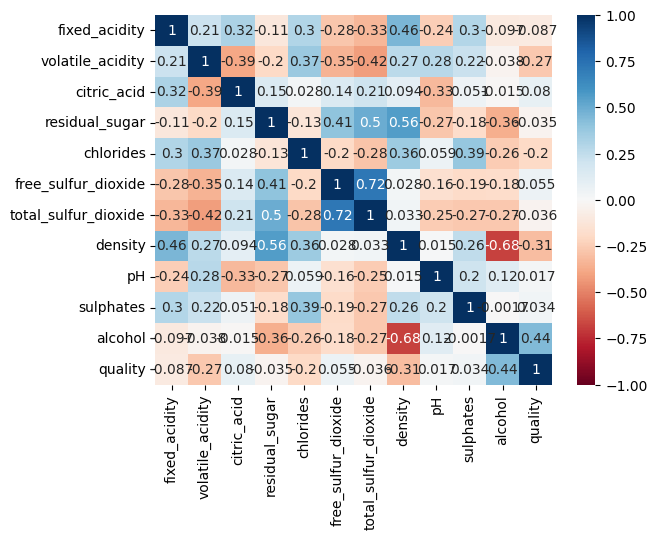

In [8]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)

<function matplotlib.pyplot.show(close=None, block=None)>

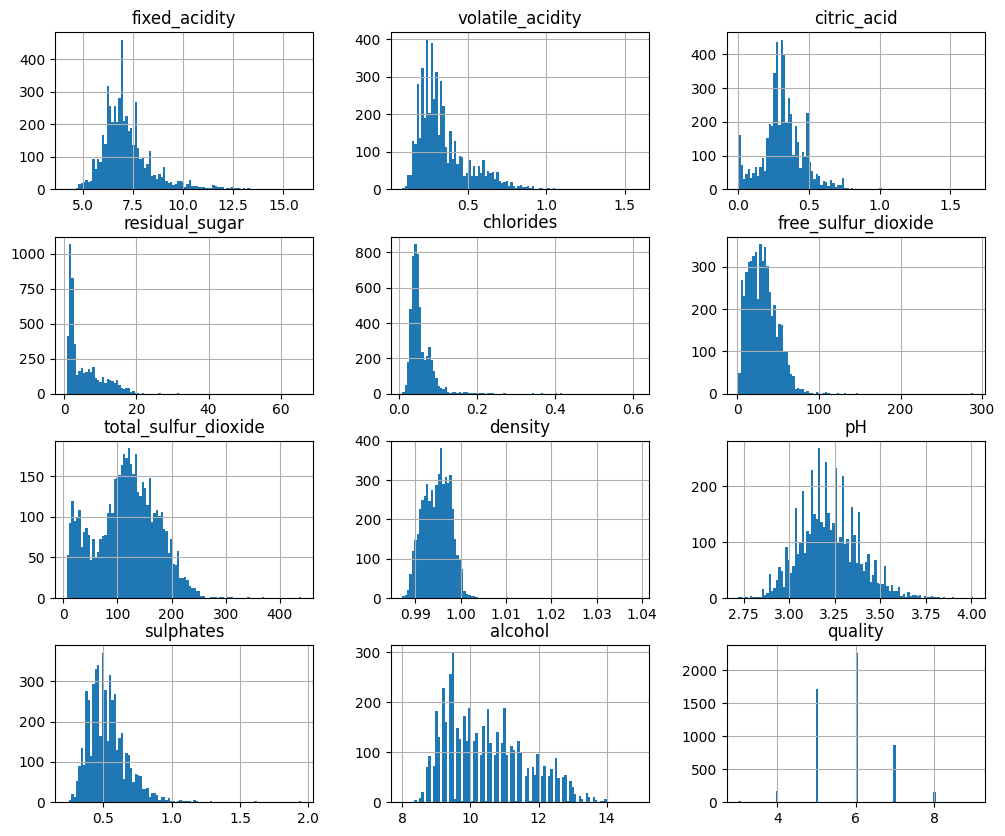

In [9]:
train.hist(bins=100, figsize=(12, 10))
plt.show

### 3.2. Data cleaning

- Handle missing values, duplicates, and outliers.

In [10]:
# Your code goes here

# Check drop_duplicates() function from pandas
# df.fillna(...)

In [11]:
train.duplicated().sum()

np.int64(793)

In [12]:
len(train)

5197

In [13]:
train.drop_duplicates(inplace=True)

In [14]:
len(train)

4404

Indeed, it removed the duplicates. Let's go with the zero values.

In [15]:
# There are no NaN values. However, there are zero values in citric_acid column. Let's see how many of them are there.
len(train[train['citric_acid'] == 0])

115

In [16]:
# This are very probably missing values, because DeepSeek says that it's extremely rare to have citric acid in wine at 0%. Let's replace them with the mean.
train['citric_acid'].replace(0, train['citric_acid'].mean(), inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_12628\552881149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['citric_acid'].replace(0, train['citric_acid'].mean(), inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

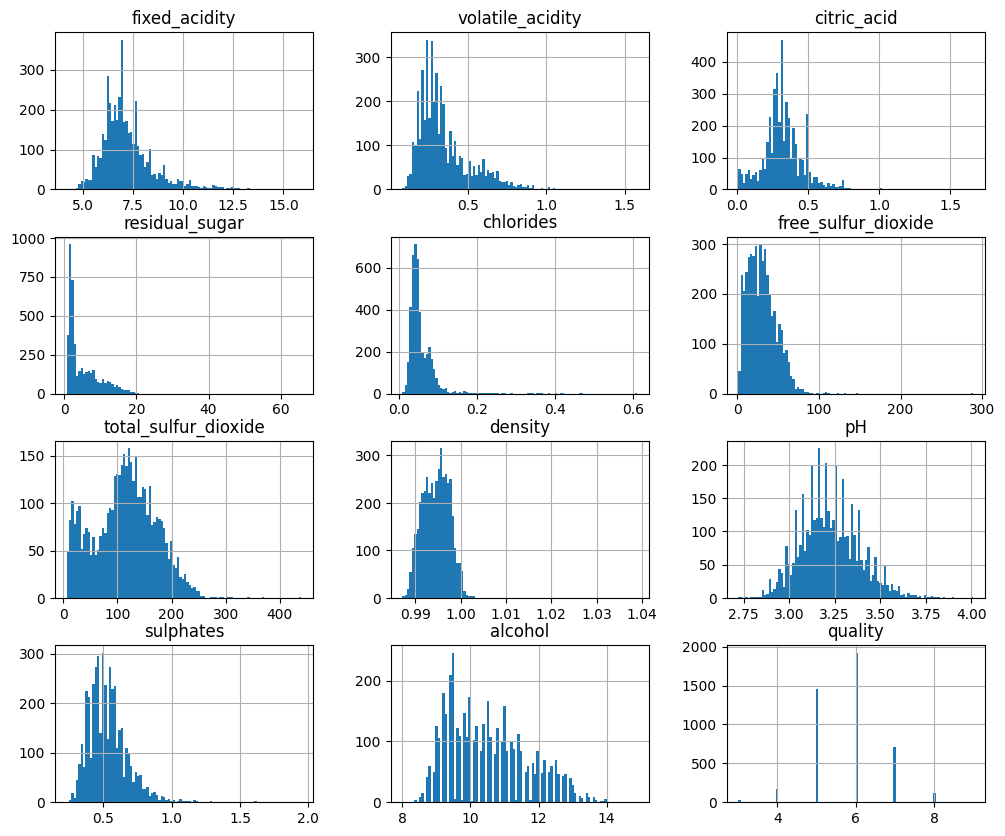

In [17]:
# Plot the histograms again juts to check if it worked.
train.hist(bins=100, figsize=(12, 10))
plt.show
# It worked! :D

In [18]:
train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000
mean,7.225829,0.343650,0.326667,5.098865,0.056547,30.026680,114.289282,0.994589,3.223790,0.533881,10.529363,5.799728
std,1.314082,0.168484,0.138306,4.555048,0.036114,17.626765,56.999335,0.002982,0.160337,0.146779,1.181242,0.878150
min,4.200000,0.080000,0.010000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,75.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.318354,2.700000,0.047000,28.000000,116.000000,0.994740,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.600000,0.066000,41.000000,154.000000,0.996800,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.950000,14.900000,9.000000


### 3.3. Feature Engineering

- Create new features (if you consider they might be useful) given the existing ones.
- Encode categorical variables (if any)
- Transform numerical features so that they have similar scales

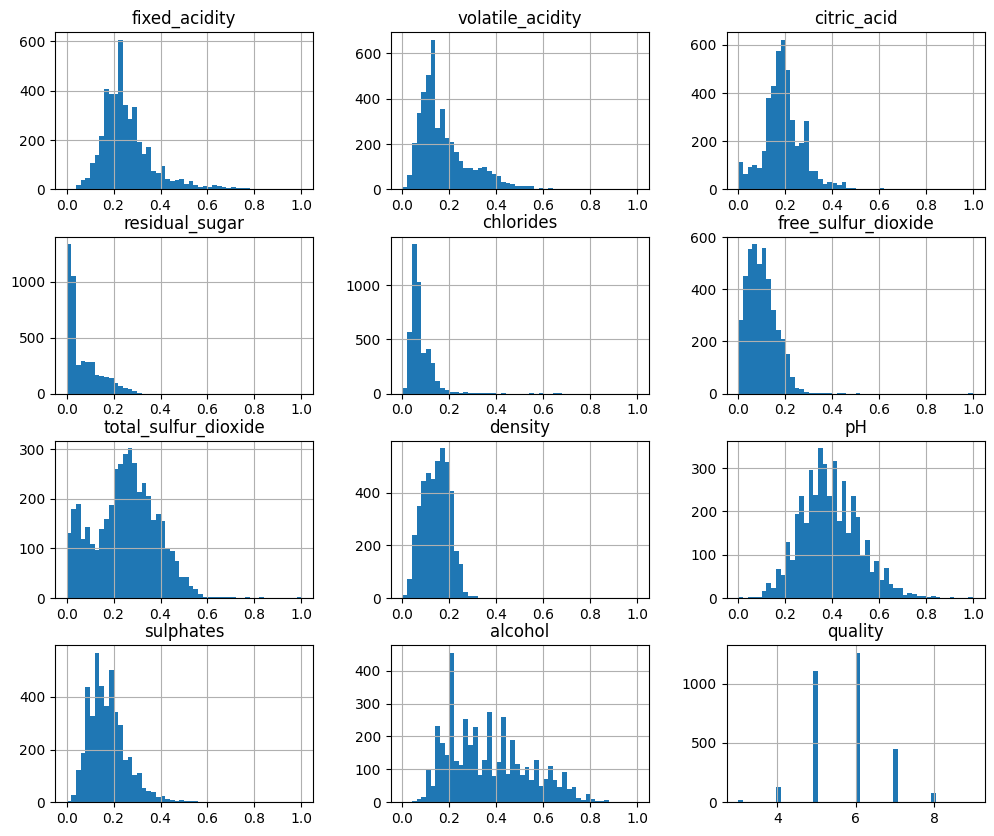

In [19]:
# We only need to normalize, because all the columns are already numerical.
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
minmaxscaler = MinMaxScaler(feature_range=(0, 1))

# Get the columns to normalize (exclude 'quality')
columns_to_normalize = train.drop(columns=['quality']).columns

# Normalize and convert back to DataFrame with column names
train_normalized = pd.DataFrame(
    minmaxscaler.fit_transform(train.drop(columns=['quality'])),
    columns=columns_to_normalize  # <-- Preserve column names
)

# Add back the 'quality' column
train_normalized["quality"] = train["quality"]

train_normalized.hist(bins=50, figsize=(12, 10))
plt.show()

We are plotting some data vs quality to see what is the tendency

<Axes: xlabel='quality', ylabel='alcohol'>

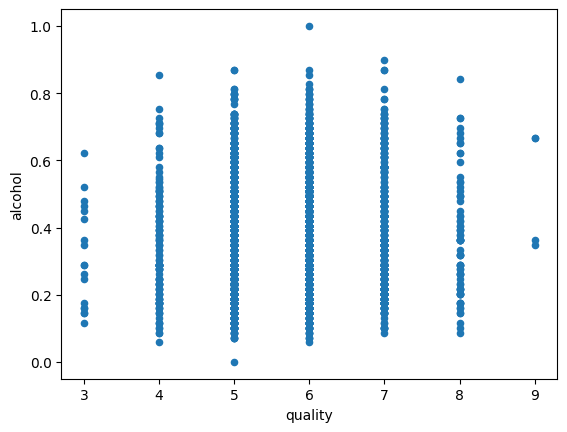

In [26]:
train_normalized.plot.scatter(x='quality', y='alcohol')

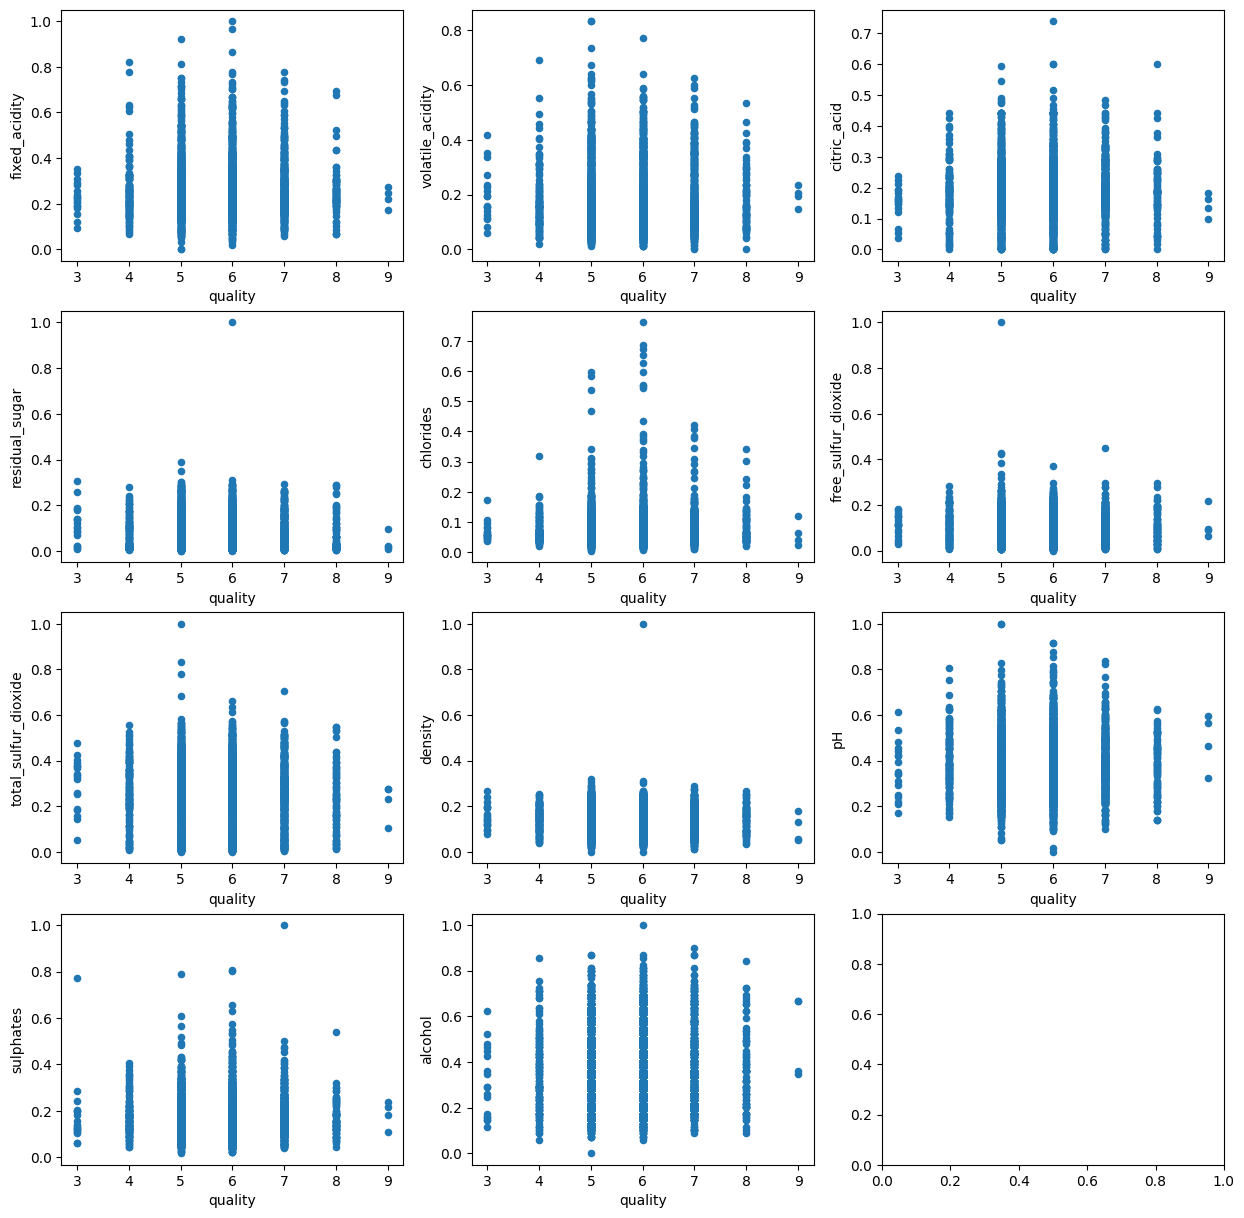

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for k, col in enumerate(train_normalized.columns[:-1]):
    i = k // 3  # Row index
    j = k % 3   # Column index
    train_normalized.plot(kind='scatter', x='quality', y=col, ax=axes[i,j])

## 4. Training

### 4.1. Define Features and Target

- Define X (features) and y (target)

In [20]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['quality'])
y = train['quality']

### 4.2. Train your model and evaluate it using Cross-validation

- Import the models that you want to use from sklearn.
- Choose some metrics that will let you know how the models are performing.
- Use cross-validation to validate them and compare their performances. Choose the best one.
- (Optional) Perform a hyperparameter search to improve the training of the model.

## 5. Evaluate on test set

- Clean and do feature engineering process on test set.
- See how the model performs on the test set.

## 6. Conclusions and future work